In [1]:
import os
import pandas as pd
from tqdm import tqdm
import csv
import matplotlib.pyplot as plt

In [2]:
def before_or_after(x, other_sub):
    idx_1 = x.loc[x["sub_category"] == "Fitness and Recreational Sports Centers"].index[0]
    idx_2 = x.loc[x["sub_category"] == other_sub].index[0]

    if idx_1 < idx_2:
        return "Fitness_First"
    else:
        return "Fitness_Later"

In [4]:
def before_or_after_with_time(x, other_sub):
    idx_1 = x.loc[x["sub_category"] == "Fitness and Recreational Sports Centers"].index[0]
    idx_2 = x.loc[x["sub_category"] == other_sub].index[0]

    if idx_1 < idx_2:
        return (x.loc[idx_2]["local_timestamp"] - (x.loc[idx_1]["local_timestamp"] + x.loc[idx_1]["minimum_dwell"]*60))/60
    else:
        return "Fitness_Later"

In [7]:
year = "2019"
month = "dec"
day   = "08"
grocery = "Supermarkets and Other Grocery (except Convenience) Stores"
base_folder = "/home/george/data/Veraset/Visits/local_dataset"

In [8]:
df = pd.read_parquet(os.path.join(base_folder, f"{year}/{month}/{day}.parquet"))

In [9]:
sub_categories = df["sub_category"].unique()
sub_categories = list(sub_categories)
sub_categories = [x for x in sub_categories if pd.isnull(x) == False]
fitness_df = df[df["sub_category"] == "Fitness and Recreational Sports Centers"]
fitness_users = fitness_df["caid"].unique()
grocery_df  = df[df["sub_category"] == grocery]
grocery_users = grocery_df["caid"].unique()
common_users = list(set(fitness_users).intersection(grocery_users))
print(len(common_users))

81578


In [10]:
df = df[df["caid"].isin(common_users)]
df = df.reset_index(drop=True)
final_df = df.groupby('caid').agg(before_or_after, grocery)
final_df_time = df.groupby('caid').agg(before_or_after_with_time, grocery)
final_df_time = final_df_time[final_df_time["minimum_dwell"] != "Fitness_Later"]

Text(15.0, 0, '10minutes')

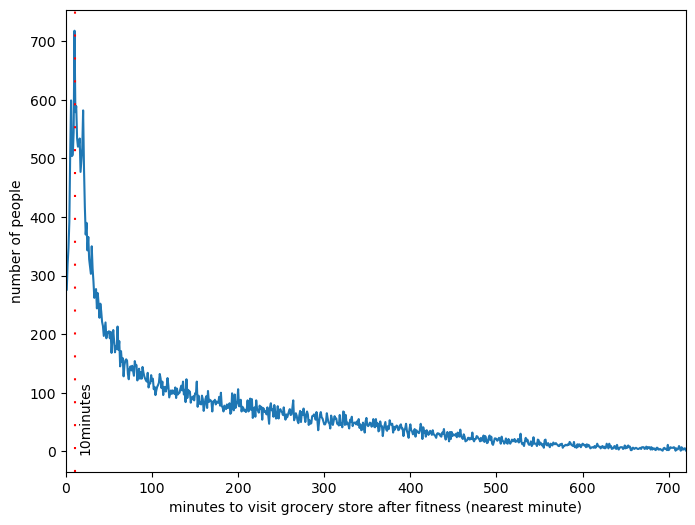

In [11]:
plt.figure(figsize=(8, 6))
final_df_time["minimum_dwell"] = final_df_time["minimum_dwell"].astype('float')
counts = final_df_time["minimum_dwell"].round().value_counts().sort_index()
counts = counts[counts.index > 0]
counts.plot(kind='line')
max_value = final_df_time["minimum_dwell"].round().value_counts().index[0]
plt.axvline(max_value, color = 'red', linestyle = (0, (1, 10)))
plt.xlabel('minutes to visit grocery store after fitness (nearest minute)')
plt.ylabel('number of people')
plt.xlim(0, 720) # Make x-axis to stop at 720 minutes (12 hours)
plt.text(max_value+5,0,str(int(max_value)) + "minutes",rotation=90)

Text(11.5, 10, '10minutes')

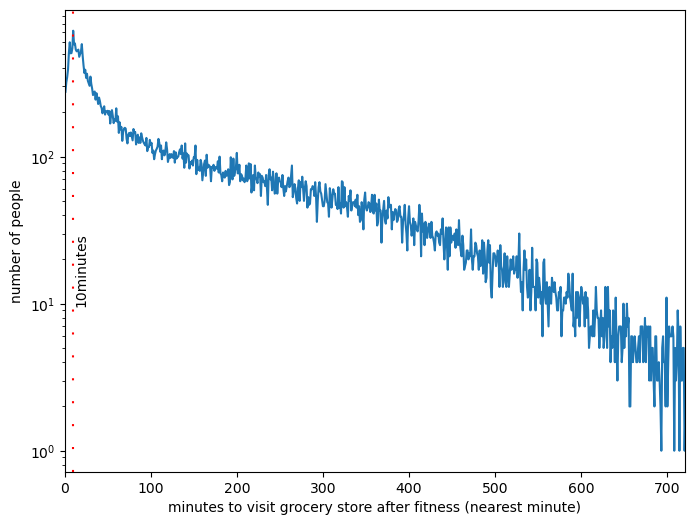

In [12]:
# Same figure but in log-scale
plt.figure(figsize=(8, 6))
# final_df_time["minimum_dwell"] = final_df_time["minimum_dwell"].astype('float')
# counts = final_df_time["minimum_dwell"].round().value_counts().sort_index()
# counts = counts[counts.index > 0]
counts.plot(kind='line')
# max_value = final_df_time["minimum_dwell"].round().value_counts().index[0]
plt.axvline(max_value, color = 'red', linestyle = (0, (1, 10)))
plt.xlabel('minutes to visit grocery store after fitness (nearest minute)')
plt.ylabel('number of people')
plt.xlim(0, 720) # Make x-axis to stop at 720 minutes (12 hours)
plt.yscale('log') # make y-axis log-scale
plt.text(max_value+1.5,10,str(int(max_value)) + "minutes",rotation=90)